
## 1. 선형 회귀모형의 이해

In [9]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# 워닝 무시
import warnings
warnings.filterwarnings('ignore')

In [10]:
# 키 데이터 불러오기
df_heights = pd.read_csv('data/heights.csv')
df_heights

,father,son
0,165.223215,151.836806
1,160.657388,160.563662
2,164.986513,160.889747
3,167.011350,159.492645
4,155.288564,163.274070
...,...,...
1073,170.171897,179.710893
1074,181.182797,173.400060
1075,182.329176,176.036961
1076,179.675460,176.027055


In [11]:
# 보험료 데이터 불러오기
df_ins = pd.read_csv('data/insurance.csv')

print(df_ins.shape)
df_ins.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<br>

### 1.1. 단순 선형 회귀 모형의 적합 

적합(fit) : 알고리즘 모형에 데이터를 주고 데이터 간 관계를 잘 설명할 수 있도록 학습시키는 것  
머신러닝에서 학습(train) 개념  
`LinearRegression()` 으로 선형회귀 모형 적합

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
# 아들키를 아빠키로 설명하는 선형회귀 모형 적합(fit)
model = LinearRegression(fit_intercept=True)   # 선형회귀 모형 선언

# 선형회귀 모형에 데이터를 주고 적합(fit) 시키기
model.fit(df_heights[['father']], df_heights['son'])

LinearRegression()

In [14]:
# 적합된 회귀계수 확인
print(model.intercept_)
print(model.coef_)

86.071975059358
[0.51409304]



**아들키-아빠키 관계식**: 
$ son = 86.072 + 0.514 \times father $

<br>


<br>
<br>

### 1.2. 다중 선형 회귀 모형 적합 


In [15]:
#  X : 설명변수/독립변수,  y : 관심변수/종속변수
X = df_ins[['age','bmi','children']]
y = df_ins['charges']
    
# 모형 설정
linear_model = LinearRegression(fit_intercept=True)

# 모형 적합
linear_model.fit(X, y)

LinearRegression()

In [16]:
# 적합된 회귀계수 확인
print(linear_model.intercept_)
print(linear_model.coef_)

-6916.243347787033
[239.99447429 332.0833645  542.86465225]


$ charges = -6916.24 + 239.99 \times age + 332.08\times bmi + 542.86\times children $

<br>

### 1.3. 범주형 변수의 수치화

In [17]:
# pandas의 get_dummies() 활용
df_dummies = pd.get_dummies(data=df_ins, drop_first=True)
df_dummies
## 범주형 변수의 수치화 -> 범주형 변수도 회귀모형 적합에 사용 가능

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [18]:
# 독립변수 선언
X = df_dummies.drop(columns=['charges'])

# 종속변수 선언
y = df_dummies['charges']

# 선형회귀 모형 적합(fit)
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(X, y)

print(linear_model.intercept_)  # 절편
print(linear_model.coef_)       # 회귀 계수

-11938.538576167142
[  256.85635254   339.19345361   475.50054515  -131.3143594
 23848.53454191  -352.96389942 -1035.02204939  -960.0509913 ]


In [19]:
# 회귀 계수 정리
coeff = pd.DataFrame(linear_model.coef_, X.columns, columns=['Coefficient'])

coeff

,Coefficient
age,256.856353
bmi,339.193454
children,475.500545
sex_male,-131.314359
smoker_yes,23848.534542
region_northwest,-352.963899
region_southeast,-1035.022049
region_southwest,-960.050991


회귀 모형식

$ charges = -11938.54\\
\qquad\qquad + 256.86\times age \\
\qquad\qquad + 339.19\times bmi \\
\qquad\qquad + 475.50\times children \\
\qquad\qquad - 131.31\times sex\_male \\
\qquad\qquad + 23848.53\times smoker\_yes\\
\qquad\qquad - 352.96\times region\_northwest	\\
\qquad\qquad - 1035.02\times region\_southeast	\\
\qquad\qquad - 960.05\times region\_southwest$

In [20]:
# r2_score(설명력) : 값이 1에 가까울수록 모형이 데이터를 잘 설명한다고 볼 수 있음.
from sklearn.metrics import r2_score

y_pred = linear_model.predict(X)
r2_score(y, y_pred)

0.7509130345985207

In [21]:
# 단순 집계와 모형의 비교
df_ins.groupby('sex')['charges'].mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

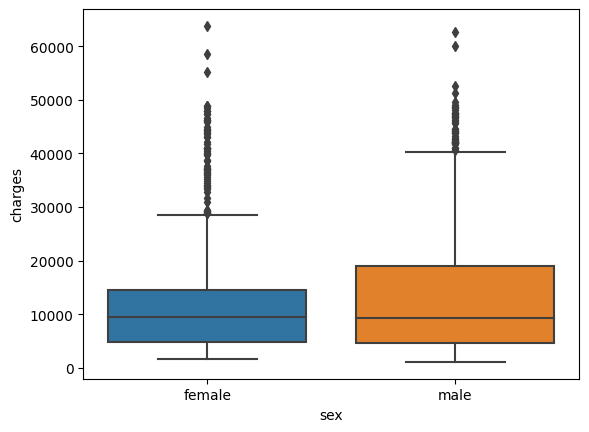

In [22]:
# 성별 보험료 상자그림
sns.boxplot(x='sex', 
            y='charges', 
            data=df_ins)
plt.show()

단순 집계와 회귀 모형의 결과가 다름
* 집계 : 남자 > 여자
* 회귀 모형 : 남자 < 여자

### 1.4. 선형 회귀 모형의 한계

선형 회귀 모형은 비선형의 관계를 반영 어려움

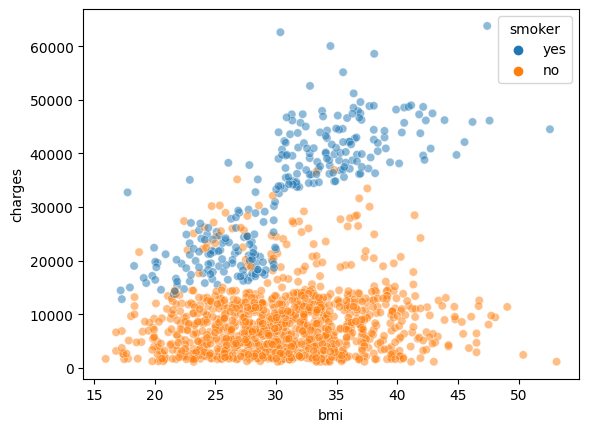

In [23]:
# 회귀 모형의 한계 - 변수 bmi와 charges의 산점도
sns.scatterplot(data=df_ins, x='bmi', y='charges', hue='smoker', alpha=0.5)
plt.show()

<br>

### 1.5. 변수 선택의 개념

각 회귀 계수에 대한 검정 결과를 활용해서 모형에 필요한 변수를 선택할 수 있습니다. 

In [24]:
# statsmodels를 활용한 회귀모형 적합과 변수 선택
import statsmodels

# 상수항 추가
import statsmodels.api as sm
X_Sm = sm.add_constant(X)
X_Sm

# 상수항 추가해주는 이유는 회귀식이 y 절편을 포함하기 때문입니다. 
# 상수항을 추가하지 않으면 회귀식이 원점을 지나게 되므로, 예측값이 크게 편향될 수 있습니다. 
# 상수항을 더해주면, 모델이 y 절편을 고려하여 데이터를 더 잘 설명할 수 있습니다.

,const,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,1.0,19,27.900,0,0,1,0,0,1
1,1.0,18,33.770,1,1,0,0,1,0
2,1.0,28,33.000,3,1,0,0,1,0
3,1.0,33,22.705,0,1,0,1,0,0
4,1.0,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,1.0,50,30.970,3,1,0,1,0,0
1334,1.0,18,31.920,0,0,0,0,0,0
1335,1.0,18,36.850,0,0,0,0,1,0
1336,1.0,21,25.800,0,0,0,0,0,1


In [25]:
# 선형회귀 모형 적합 및 각 변수에 대한 검정
ls = sm.OLS(y, X_Sm).fit()
ls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Sun, 14 May 2023   Prob (F-statistic):               0.00
Time:                        14:47:18   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.194e+04    987.819    -12.086      0.000   -1.39e+04      -1e+04
age                256.8564     11.899     21.587      0.000     233.514     280.199
bmi                339.1935     28.599     11.860      0.000     283.088     395.298
children           475.5005    137.804      3.451      0.001     205.163     745.838
sex_male          -131.3144    332.945     -0.394      0.693    -784.470     521.842
smoker_yes        2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
region_northwest  -352.9639    476.276     -0.741      0.459   -1287.298     581.370
region_southeast -1035.0220    478.692     -2.162      0.031   -1974.097     -95.947
region_southwest  -960.0510    477.933     -2.009      0.045   -1897.636     -22.466
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


<br>

### 1.6. 모형 활용 예측

적합된 모형을 활용하여 실제값이 없는 신규 데이터에 대해 `predict()`를 활용해 예측값을 계산할 수 있습니다. 

In [26]:
# 신규 데이터 5건
df_ins_test = pd.read_csv('data/insurance_test.csv')
df_ins_test

,age,sex,bmi,children,smoker,region
0,21,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,30,male,33.000,3,no,southeast
3,33,female,22.705,0,yes,northwest
4,43,male,32.120,2,yes,northeast


In [27]:
# 동일한 처리(범주형 변수의 수치화)
df_dummies_test = pd.get_dummies(data=df_ins_test, drop_first=True)
df_dummies_test

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,21,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,30,33.000,3,1,0,0,1,0
3,33,22.705,0,0,1,1,0,0
4,43,32.120,2,1,1,0,0,0


In [28]:
# 예측 값 계산
linear_model.predict(df_dummies_test)

array([25807.42573347,  3448.60283431,  7220.70119578, 27734.67906429,
       34669.39958573])

#### End of script